# Работа с базами данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Работа с базами данных"
* https://sqliteonline.com/
* https://docs.python.org/3/library/sqlite3.html
* https://www.sqlitetutorial.net/sqlite-create-table/
* https://docs.python.org/3/library/pickle.html
* https://www.geeksforgeeks.org/sql-join-set-1-inner-left-right-and-full-joins/
* https://www.datacamp.com/community/tutorials/group-by-having-clause-sql

## Задачи для совместного разбора

In [1]:
import pandas as pd
import csv
import sqlite3

1. Создайте БД sqlite3 и таблицы Student и StudentGroup в ней.

2. Заполните созданные таблицы данными

## Лабораторная работа 3

__При решении данных задач не подразумевается использования циклов или генераторов Python в ходе работы с пакетами `numpy` и `pandas`, если в задании не сказано обратного. Решения задач, в которых для обработки массивов `numpy` или структур `pandas` используются явные циклы (без согласования с преподавателем), могут быть признаны некорректными и не засчитаны.__

### Создание и заполнение базы данных

<p class="task" id="1"></p>

1\. Создайте файл БД sqlite3 согласно рисунку ниже, на котором определен набор таблиц и связей между ними. Обратите внимание, что поля, выделенные полужирным шрифтом, обозначают первичный ключ таблицы.

Для решения задания напишите скрипт на языке SQL и исполните его при помощи метода `executescript` объекта-курсора.

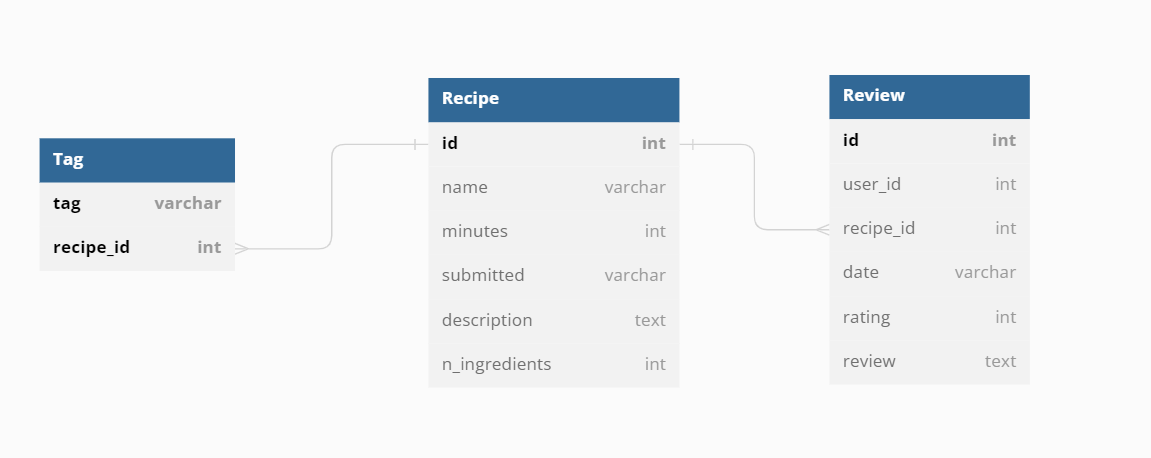

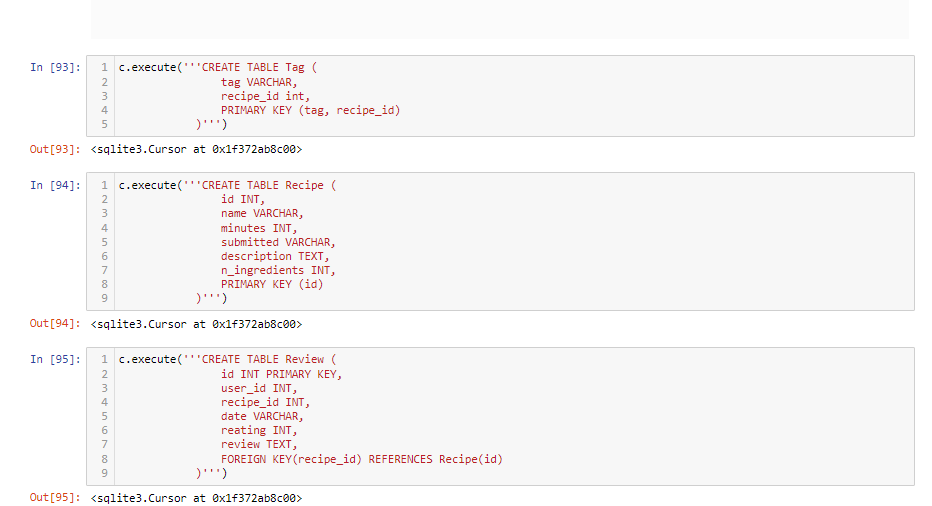

In [2]:
con = sqlite3.connect("sqlite3")

In [3]:
cur = con.cursor()

In [4]:
cur.executescript('''
    CREATE TABLE Tag (
                tag VARCHAR,
                recipe_id int,
                PRIMARY KEY (tag, recipe_id));
    CREATE TABLE Recipe (
                id INT,
                name VARCHAR,
                minutes INT,
                submitted VARCHAR,
                description TEXT,
                n_ingredients INT,
                FOREIGN KEY(id) REFERENCES Tag(recipe_id)
                PRIMARY KEY (id));
    CREATE TABLE Review (
                id INT PRIMARY KEY,
                user_id INT,
                recipe_id INT,
                date VARCHAR,
                rating INT,
                review TEXT,
                FOREIGN KEY(recipe_id) REFERENCES Recipe(id)
);
''')

In [5]:
con.commit()

<p class="task" id="2"></p>

2\. Загрузите данные из файла `recipes_sample.csv` в таблицу `Recipe`. При выполнении задания воспользуйтесь методом `executemany` объекта-курсора.

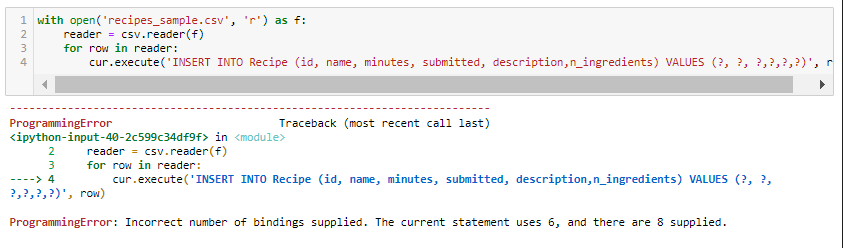

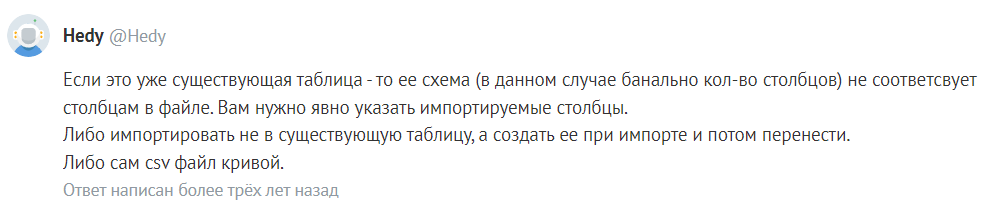

Невозможно загрузить весь файл, там 8 колон name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients, а мы создаем 6 в таблице

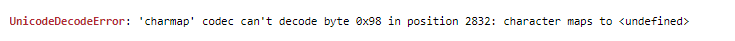

In [6]:
#with open('recipes_sample.csv', encoding='utf-8') as f:
    #reader = csv.reader(f)
    #next(reader)  # пропускаем заголовок
    #recipe_data = [(row[0], row[1], row[2], row[3], row[4], row[5]) for row in reader] список кортежей

#cur.executemany("INSERT INTO Recipe (name, id, minutes,submitted, description, n_ingredients) VALUES (?, ?, ?, ?, ?, ?)", recipe_data)

In [7]:
sql = '''
INSERT INTO Recipe(name, id, minutes, submitted, description, n_ingredients) VALUES(?, ?, ?, ?, ?, ?)
'''
recipes = pd.read_csv('recipes_sample.csv')
recipes = recipes.drop(['contributor_id', 'n_steps'], axis=1)
cur.executemany(sql, recipes.values)
recipes = pd.read_sql('select * from Recipe;', con)
recipes

,id,name,minutes,submitted,description,n_ingredients
0,44123,george s at the cove black bean soup,90,2002-10-25,an original recipe created by chef scott meska...,18.0
1,67664,healthy for them yogurt popsicles,10,2003-07-26,my children and their friends ask for my homem...,NaN
2,38798,i can t believe it s spinach,30,2002-08-29,"these were so go, it surprised even me.",8.0
3,35173,italian gut busters,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
4,84797,love is in the air beef fondue sauces,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...
29995,267661,zurie s holey rustic olive and cheddar bread,80,2007-11-25,this is based on a french recipe but i changed...,10.0
29996,386977,zwetschgenkuchen bavarian plum cake,240,2009-08-24,"this is a traditional fresh plum cake, thought...",11.0
29997,103312,zwiebelkuchen southwest german onion cake,75,2004-11-03,this is a traditional late summer early fall s...,NaN
29998,486161,zydeco soup,60,2012-08-29,this is a delicious soup that i originally fou...,NaN


In [8]:
con.commit()

In [9]:
cur.fetchall()


[]

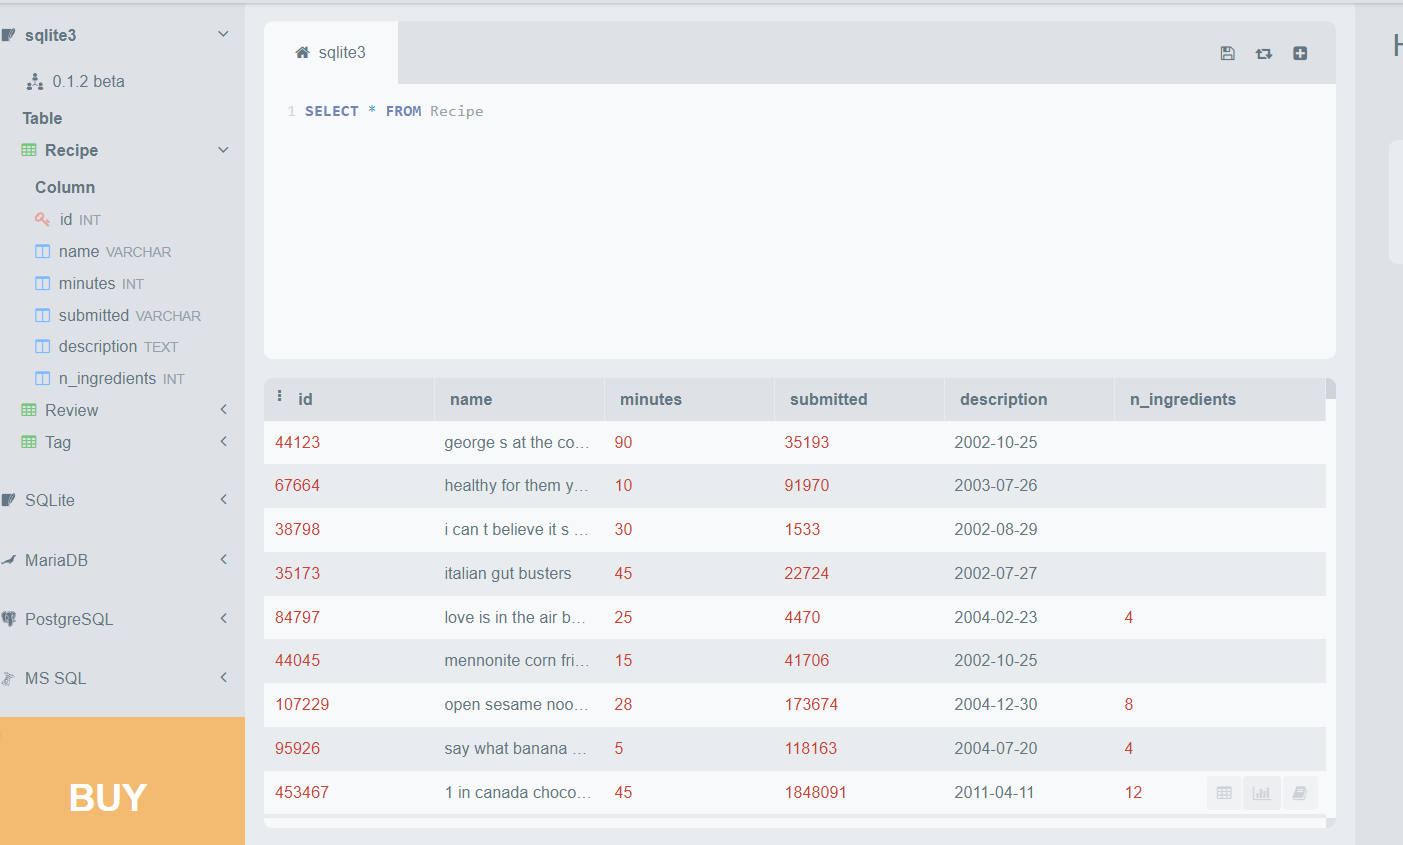

In [10]:
#with open('recipes_sample.csv', 'r') as f:
    #reader = csv.reader(f)
    #for row in reader:
        #cur.execute('INSERT INTO Recipe (id, name, minutes, submitted, description,n_ingredients) VALUES (?,?,?,?,?,?)', row)

<p class="task" id="3"></p>

3\. Загрузите данные из файла `reviews_sample.csv` в таблицу `Review`. При выполнении задания воспользуйтесь методом `pd.DataFrame.to_sql`.

In [11]:
reviews = pd.read_csv('reviews_sample.csv')
reviews

,Unnamed: 0,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...,...
126691,1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
126692,158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
126693,1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
126694,453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


In [12]:
reviews = reviews.rename(columns={'Unnamed: 0':'id'})

In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126696 entries, 0 to 126695
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         126696 non-null  int64 
 1   user_id    126696 non-null  int64 
 2   recipe_id  126696 non-null  int64 
 3   date       126696 non-null  object
 4   rating     126696 non-null  int64 
 5   review     126679 non-null  object
dtypes: int64(4), object(2)
memory usage: 5.8+ MB


In [14]:
reviews.to_sql('Review', con, if_exists='append', index=False) # if_exists='append' если таблица уже существует, то новые данные будут добавлены к уже существующим, а не заменят их
#index=False индексы не будут сохранены в базу данных

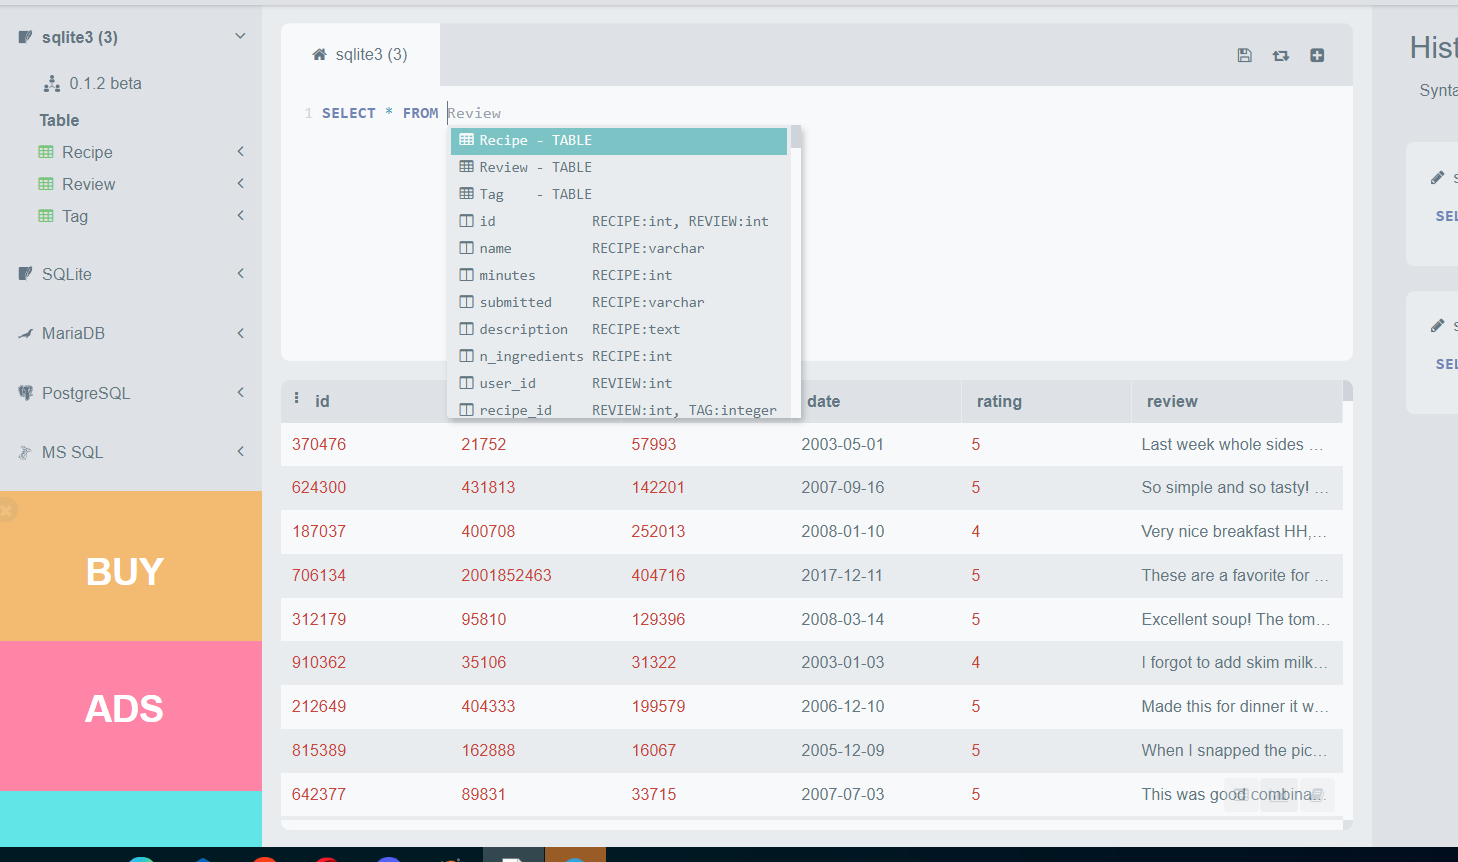

<p class="task" id="4"></p>

4\. Загрузите данные из файла `tags_sample.pickle` в таблицу `Tag`. При выполнении задания воспользуйтесь методом `executemany` объекта-курсора или методом `pd.DataFrame.to_sql`. 

Для считывания файла с данными воспользуйтесь пакетом `pickle`. Обратите внимание, что перед добавлением записей в базу данные нужно привести к соответствующему таблице в БД виду (в каждой строчке столбца tag должен находиться один тэг).

In [15]:
cur.fetchall()

[]

In [16]:
import pickle

In [17]:
with open('tags_sample.pickle', 'rb') as f:
    tags = pd.DataFrame(pickle.load(f)).explode('tag') #чтобы каждый элемент этого столбца был разделен на отдельные строки в DataFrame. 
tags

,id,tag
0,48,course
0,48,preparation
0,48,weeknight
0,48,oven
0,48,time-to-make
...,...,...
29983,536747,cakes
29983,536747,time-to-make
29983,536747,4-hours-or-less
29983,536747,for-large-groups


In [18]:
tags=tags.rename(columns={'id': 'recipe_id'})


In [19]:
tags.to_sql('Tag', con, if_exists='replace', index=False)
tags = pd.read_sql('select * from Tag;', con)

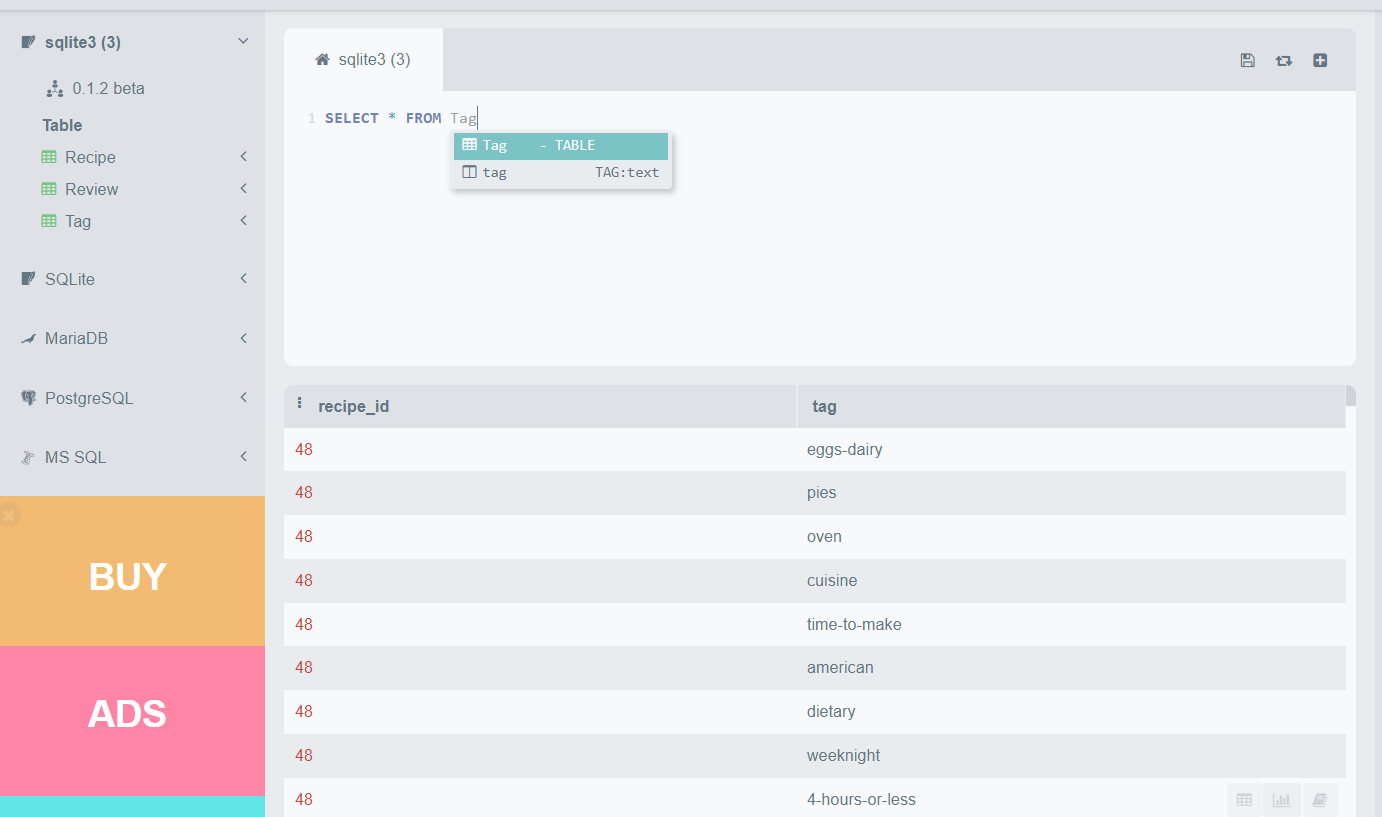

---
### Получение данных из базы

<p class="task" id="5"></p>

5\. Напишите и выполните запрос на языке SQL, который считает кол-во рецептов, опубликованных в 2010 году и имеющих длину не менее 15 минут. Для выполнения запроса используйте метод `execute` объекта-курсора. Выведите искомое количество на экран.

In [20]:
zapros = cur.execute('SELECT COUNT(*) FROM Recipe WHERE submitted like "%2010%"')
zapros.fetchall()

[(1538,)]

<p class="task" id="6"></p>

6\. Напишите и выполните запрос на языке SQL, который возращает id рецептов, не имеющих ни одного отзыва отзывов с рейтингом, меньше 4. Для выполнения запроса используйте функцию `pd.read_sql_query`. Выведите полученный результат на экран.

In [21]:
sql = '''
    SELECT DISTINCT recipe_id FROM Review
    WHERE rating < 4
'''
pd.read_sql_query(sql, con)

,recipe_id
0,285773
1,109536
2,13707
3,140771
4,233189
...,...
7629,125771
7630,274758
7631,368208
7632,28248


In [22]:
sql='''
    SELECT * FROM Recipe
'''
pd.read_sql_query(sql, con)

,id,name,minutes,submitted,description,n_ingredients
0,44123,george s at the cove black bean soup,90,2002-10-25,an original recipe created by chef scott meska...,18.0
1,67664,healthy for them yogurt popsicles,10,2003-07-26,my children and their friends ask for my homem...,NaN
2,38798,i can t believe it s spinach,30,2002-08-29,"these were so go, it surprised even me.",8.0
3,35173,italian gut busters,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
4,84797,love is in the air beef fondue sauces,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...
29995,267661,zurie s holey rustic olive and cheddar bread,80,2007-11-25,this is based on a french recipe but i changed...,10.0
29996,386977,zwetschgenkuchen bavarian plum cake,240,2009-08-24,"this is a traditional fresh plum cake, thought...",11.0
29997,103312,zwiebelkuchen southwest german onion cake,75,2004-11-03,this is a traditional late summer early fall s...,NaN
29998,486161,zydeco soup,60,2012-08-29,this is a delicious soup that i originally fou...,NaN


In [23]:
30000-7634

22366

In [25]:
sql = '''
SELECT id FROM Recipe
WHERE id NOT IN (
    SELECT recipe_id FROM Review
    WHERE rating < 4
)
'''

pd.read_sql_query(sql, con)

,id
0,55
1,66
2,91
3,94
4,128
...,...
22361,536360
22362,536473
22363,536547
22364,536728



    <p class="task" id="7"></p>

7\. Используя механизмы группировки и объединения, которые предоставляет SQL, выведите на экран названия и количество тегов 5 рецептов, которые имеют наибольшее количество тэгов. При выполнении задания воспользуйтесь методом `execute` объекта-курсора. Измерьте время выполнения работы вашего кода.

Вся необходимая логика (группировки, объединения, выбор топ-5 строк) должна быть реализована на SQL, а не в виде кода на Python.

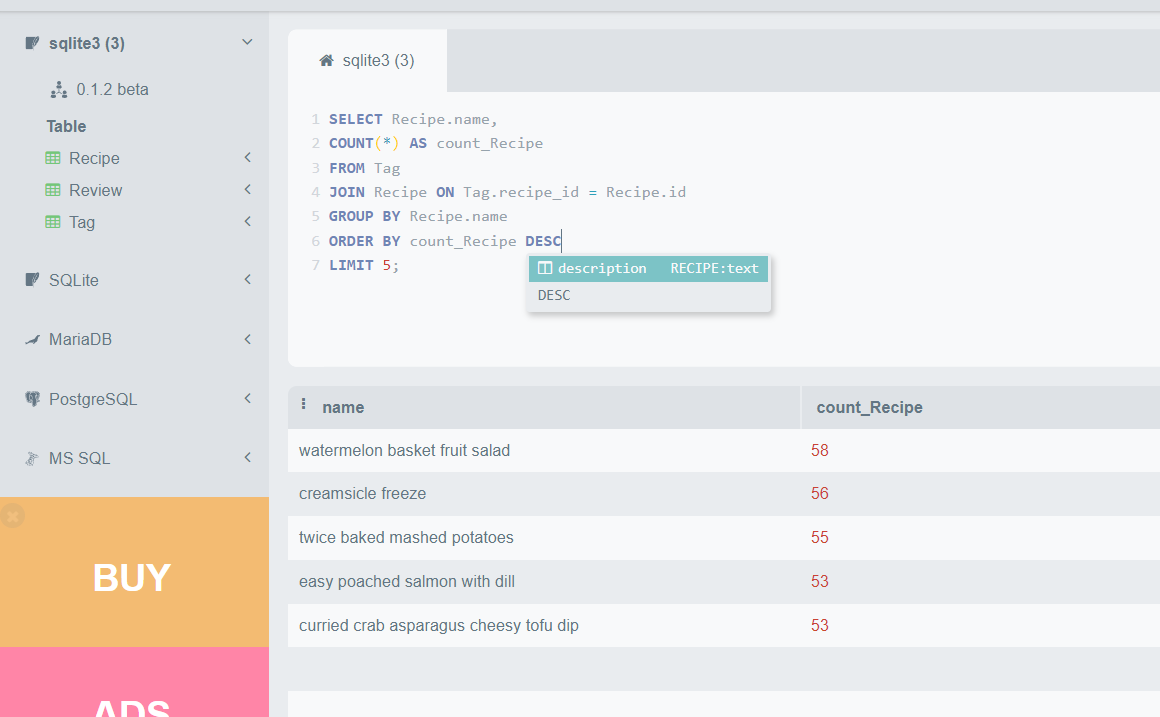

In [31]:
sql="""
SELECT r.name,
Count(*) as count_r #подсчитывает количество строк в таблице Tag, связанных с каждым рецептом, и дает этому столбцу имя count_r
FROM Tag as t
JOIN Recipe as r on t.recipe_id = r.id #объединяет таблицы Tag и Recipe по полю recipe_id
GROUP BY r.name # группирует результаты по столбцу name
ORDER BY count_r DESC #сортирует результаты DESC -от большего к меньшему
LIMIT 5;
"""

pd.read_sql_query(sql, con)

,name,count_r
0,watermelon basket fruit salad,58
1,creamsicle freeze,56
2,twice baked mashed potatoes,55
3,easy poached salmon with dill,53
4,curried crab asparagus cheesy tofu dip,53


<p class="task" id="8"></p>

8\. Запросите у пользователя id рецепта и верните информацию об этом рецепте. Если рецепт отсутствует, выведите соответствующее сообщение. Для подстановки значения id необходимо воспользоваться специальным синтаксисом, которые предоставляет `sqlite` для этих целей. Продемонстрируйте работоспособность вашего решения.

In [27]:
sql = '''
SELECT * FROM Recipe WHERE id = ?
'''

def poisk(sql):
    x = int(input())
    r = cur.execute(sql, [x]) #запрос курсора с переданным x в кач аргум
    if r.fetchone() == None: #проверка
        print('Рецепта с таким id не существует!')
        return poisk(sql)
    else:
        r = cur.execute(sql, [x])
        return r.fetchone()
    
poisk(sql)

16
Рецепта с таким id не существует!
17
Рецепта с таким id не существует!
18
Рецепта с таким id не существует!
19
Рецепта с таким id не существует!
20
Рецепта с таким id не существует!
21
Рецепта с таким id не существует!
22
Рецепта с таким id не существует!
23
Рецепта с таким id не существует!
24
Рецепта с таким id не существует!
25
Рецепта с таким id не существует!
26
Рецепта с таким id не существует!
27
Рецепта с таким id не существует!
28
Рецепта с таким id не существует!
29
Рецепта с таким id не существует!
30
Рецепта с таким id не существует!
31
Рецепта с таким id не существует!
32
Рецепта с таким id не существует!
33
Рецепта с таким id не существует!
34
Рецепта с таким id не существует!
35
Рецепта с таким id не существует!
36
Рецепта с таким id не существует!
37
Рецепта с таким id не существует!
38
Рецепта с таким id не существует!
39
Рецепта с таким id не существует!
40
Рецепта с таким id не существует!
41
Рецепта с таким id не существует!
42
Рецепта с таким id не существует!
4

(48, 'boston cream pie', 135, '1999-08-24', None, 15)

In [ ]:
con.commit()

In [ ]:
con.close()